# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Regresi pada Energy Efficiency menggunakan KNN

<b>Kelompok: </b>

Anggota:
1. Muhammad Taufiq Al Fikri - 1301223417
2. Raditya Arta Parartama - 1301223197
3. Shalisyah Amania Fatiha - 1301223251

#### Pendahuluan
Dataset yang kami gunakan merupakan data dari penilaian kebutuhan beban pemanasan dan beban pendinginan bangunan (yaitu efisiensi energi) sebagai fungsi dari parameter bangunan.

Untuk training dan testing kami akan pisahkan dulu data yang akan digunakan untuk train dan test menggunakan train_test_split dengan ukuran data test 20% dari keseluruhan data. Kami akan gunakan parameter MSE dan R-Squared pada testing untuk mengukur sejauh mana model ini bekerja.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score
from ucimlrepo import fetch_ucirepo

In [9]:
file_path = 'ENB2012_data.xlsx'

df = pd.read_excel(file_path, sheet_name='Φύλλο1')

print(df)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


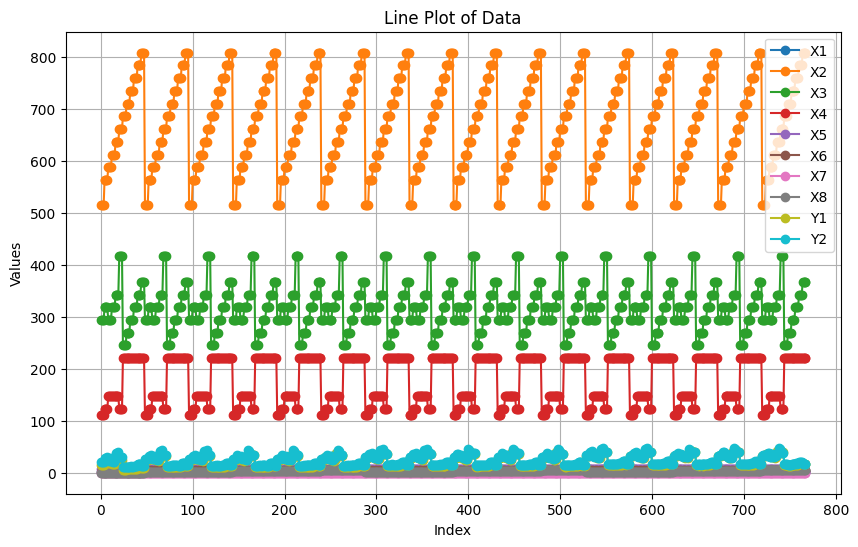

In [10]:
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title('Line Plot of Data')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

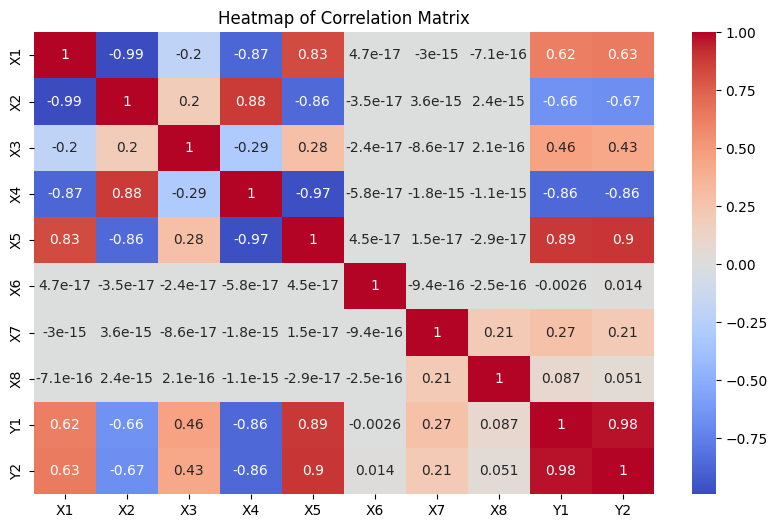

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

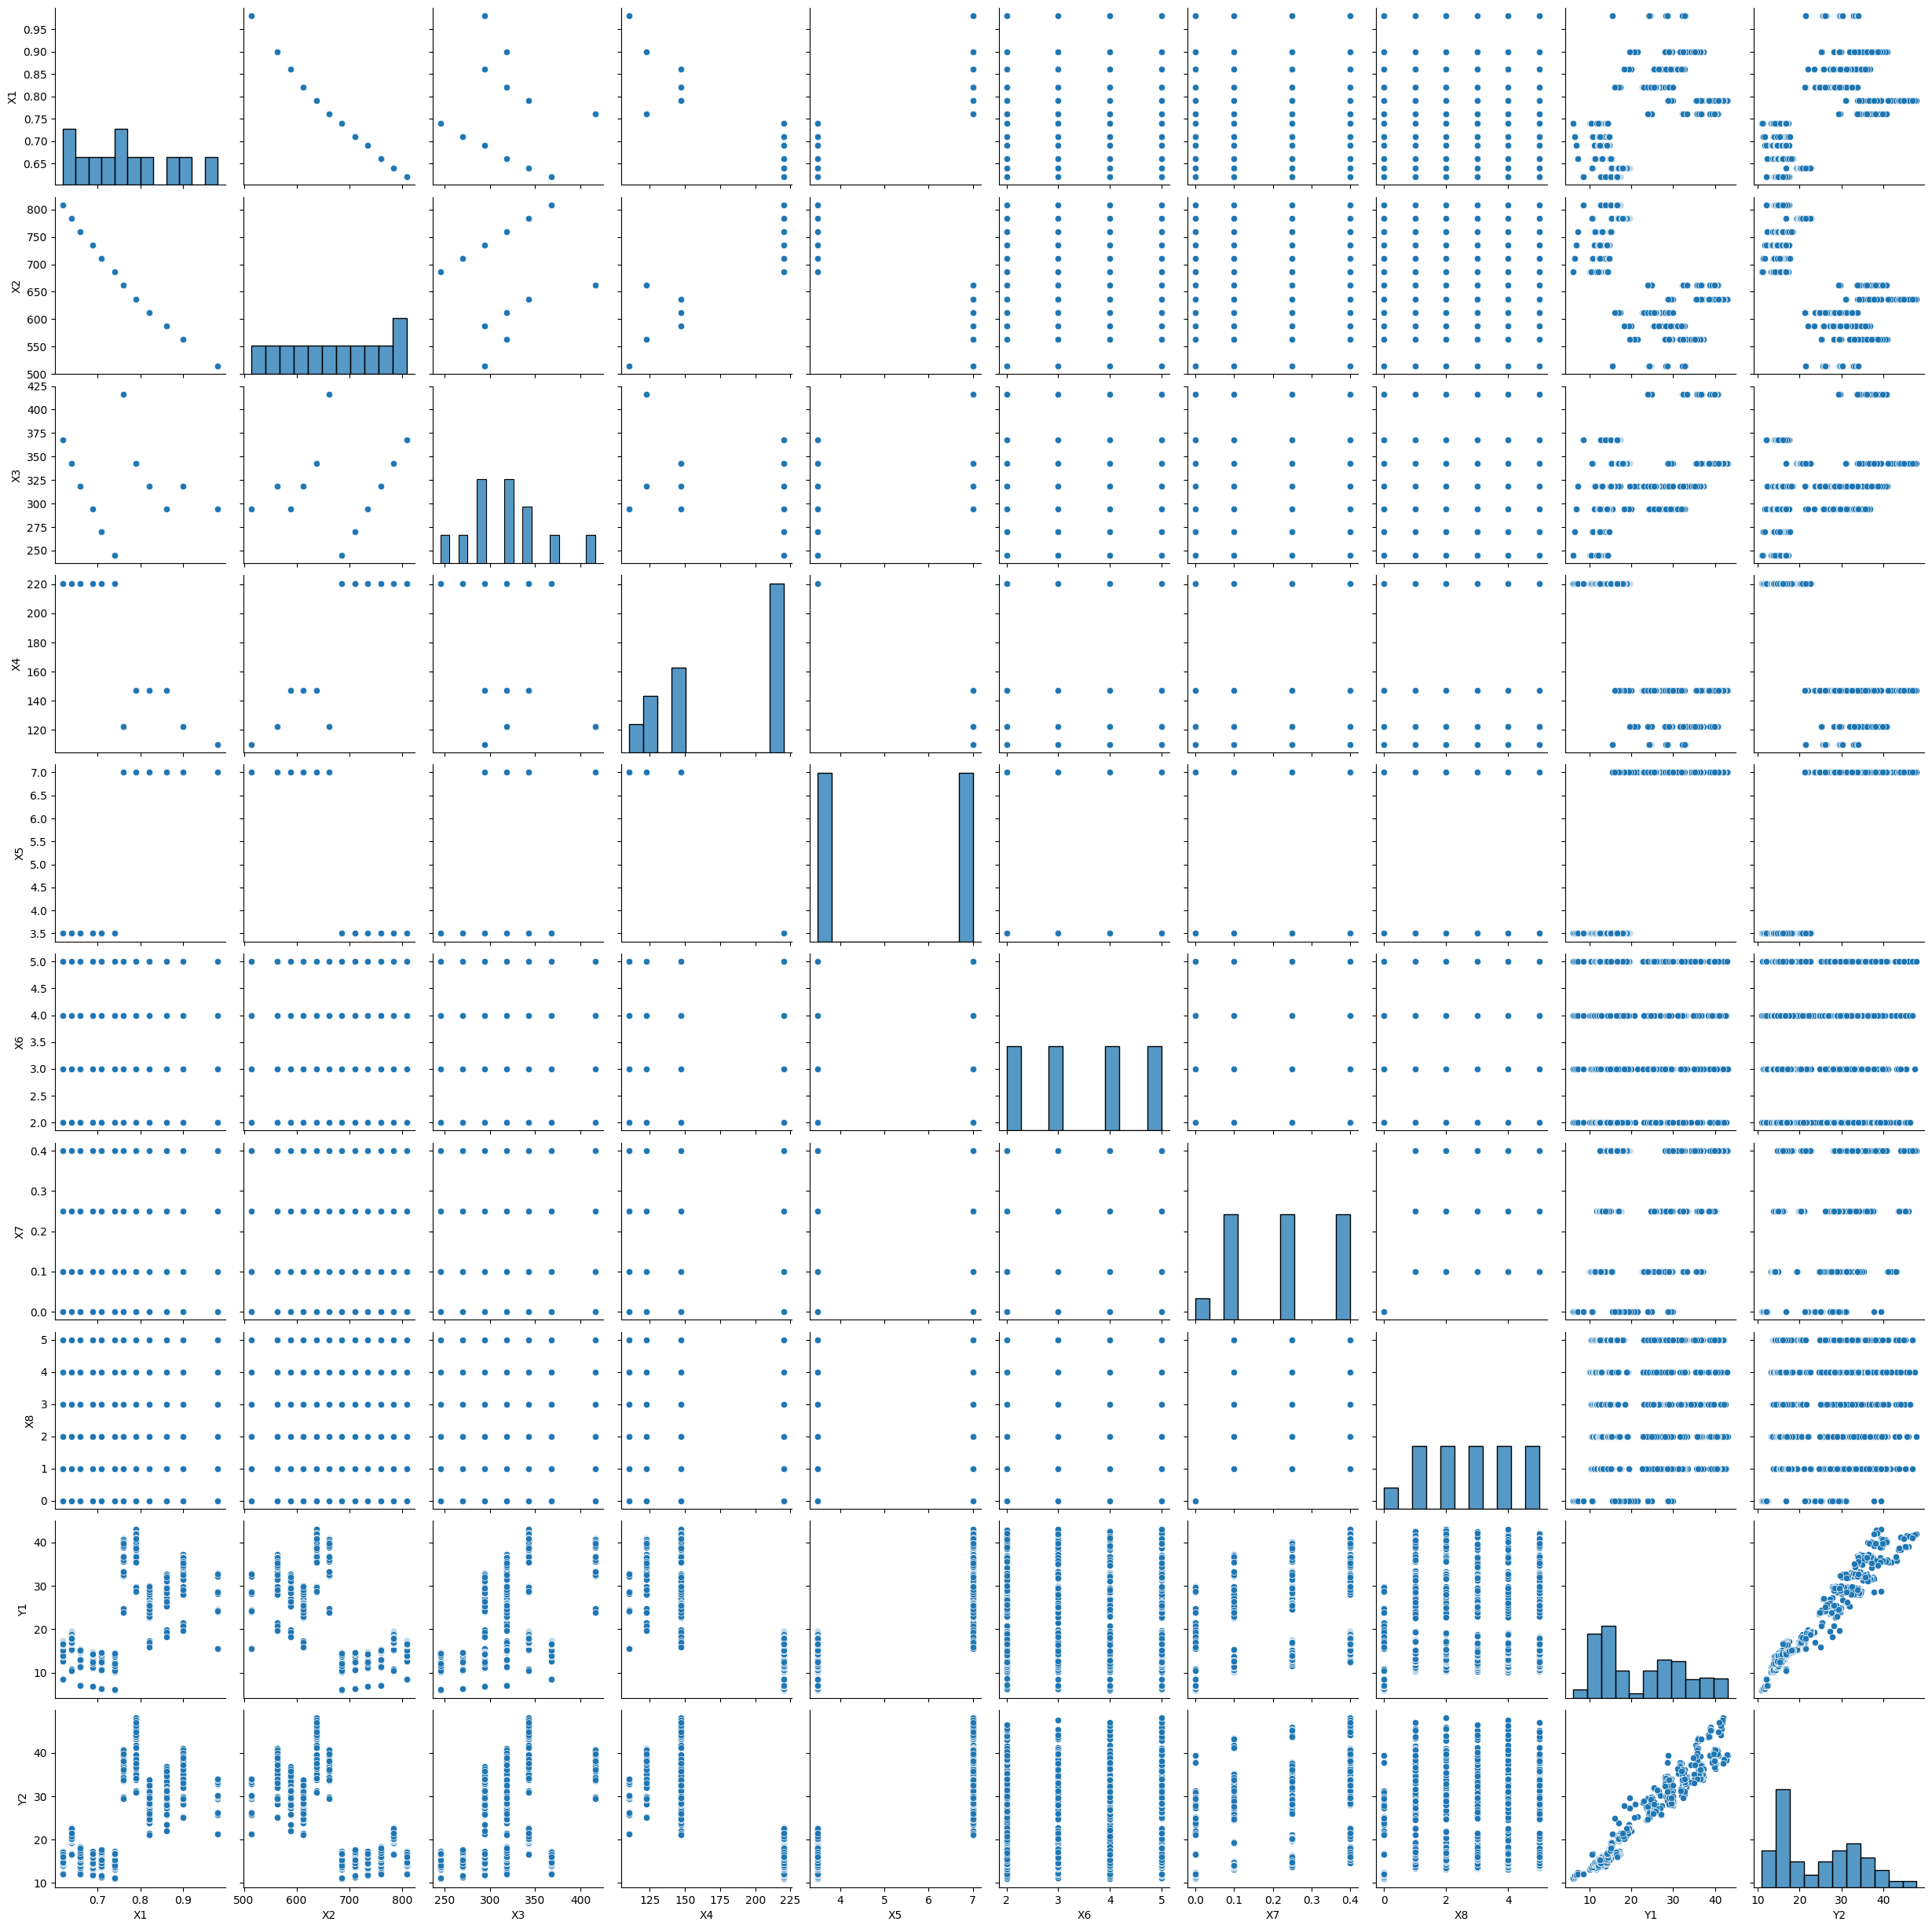

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
print(df.isna().sum()) # Melihat jumlah data yang hilang

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [14]:
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y1 = df[['Y1']]
Y2 = df[['Y2']]

# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 

# data (as pandas dataframes) 
X_ucirepo = energy_efficiency.data.features 
Y_ucirepo = energy_efficiency.data.targets  # Target Y

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y1_train, y1_temp = train_test_split(X_scaled, Y1, test_size=0.3, random_state=0)
X_valid, X_test, y1_valid, y1_test = train_test_split(X_temp, y1_temp, test_size=0.5, random_state=0)

X_train2, X_temp2, y2_train, y2_temp = train_test_split(X_scaled, Y2, test_size=0.3, random_state=0)
X_valid2, X_test2, y2_valid, y2_test = train_test_split(X_temp2, y2_temp, test_size=0.5, random_state=0)

#### Metode yang Digunakan
Dalam dataset dijelaskan bahwa output Y1 dan Y2 bertipe continuous maka dari itu kami perlu menyelesaikannya dengan regresi. Jika menggunakan klasifikasi, Y1 dan Y2 harus berbentuk kategori/label. Untuk metode yang kami gunakan adalah KNN dengan beberapa percobaan dalam penetuan nilai K menggunakan euclidean atau manhattan. Kami akan melakukan iterasi untuk mencari nilai terbaik K dengan mse atau r2 score. ketika menemukan mse atau r2score terendah maka itu merupakan K terbaik

In [28]:
def euclidean(var_data,var_test):
  return np.sqrt(np.sum((var_data-var_test)**2))

def manhattan_dist(pt1, pt2):
    distance = 0.0
    for i in range(len(pt1)):
        distance += abs(pt1[i] - pt2[i])
    return distance


def KNNEucledian(x_train,y_train,x_test):
  dist=[]
  for i in range(len(x_train)):
     distance=euclidean(x_train[i],x_test)
     dist.append((distance,y_train[i]))
      
  dist.sort(key=lambda x: x[0])
  return dist 

def KNNManhattan(x_train,y_train,x_test):
  dist=[]
  for i in range(len(x_train)):
     distance=manhattan_dist(x_train[i],x_test)
     dist.append((distance,y_train[i]))
  dist.sort(key=lambda x: x[0])
  return dist 

def Result(dist,k):
    distanceY1=0
    
    for i in range (k):
        distanceY1=distanceY1+dist[i][1]
        
    return distanceY1/k
        
 
def predictEucledian(x_train,y_train,x_test,k):
    y_pred=[]
    for i in x_test:
        dist=KNNEucledian(x_train,y_train,i)
        y_pred.append(Result(dist,k))
    return y_pred
        
def predictManhattan(x_train,y_train,x_test,k):
    y_pred=[]
    for i in x_test:
        dist=KNNManhattan(x_train,y_train,i)
        y_pred.append(Result(dist,k))
    return y_pred

def hyperParameter(x_train, y_train, x_valid, y_valid):
    candidate_k = range(2, 20)
    best_params = {
        'euclidean': {'k': -1, 'mse': float('inf'), 'r2': float('-inf')},
        'manhattan': {'k': -1, 'mse': float('inf'), 'r2': float('-inf')}
    }

    for k in candidate_k:
        # Euclidean
        y_pred_e = predictEucledian(x_train, y_train, x_valid, k)
        mse_e = mean_squared_error(y_valid, y_pred_e)
        r2_e = r2_score(y_valid, y_pred_e)
        if r2_e > best_params['euclidean']['r2_e']:
            best_params['euclidean'] = {'k': k, 'mse': mse_e, 'r2': r2_e}

        # Manhattan
        y_pred_m = predictManhattan(x_train, y_train, x_valid, k)
        mse_m = mean_squared_error(y_valid, y_pred_m)
        r2_m = r2_score(y_valid, y_pred_m)
        if r2_e > best_params['manhattan']['r2_e']:
            best_params['manhattan'] = {'k': k, 'mse': mse_m, 'r2': r2_m}

    return best_params

def FinalTest(x_train, y_train, x_test, y_test, method, k):
    if method == 'euclidean':
        y_pred = predictEucledian(x_train, y_train, x_test, k)
    else:
        y_pred = predictManhattan(x_train, y_train, x_test, k)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [16]:
for k in range(1, 20):
    yPredEuclidean1 = predictEucledian(X_train, y1_train.values.flatten(), X_valid, k)
    yPredEuclidean2 = predictEucledian(X_train, y2_train.values.flatten(), X_valid, k)
    yPredManhattan1 = predictManhattan(X_train, y1_train.values.flatten(), X_valid, k)
    yPredManhattan2 = predictManhattan(X_train, y2_train.values.flatten(), X_valid, k)
    
    
    
    mse_y1_euclidean = mean_squared_error(y1_valid, yPredEuclidean1)
    mse_y2_euclidean = mean_squared_error(y2_valid, yPredEuclidean2)
    r2_y1_euclidean = r2_score(y1_valid, yPredEuclidean1)
    r2_y2_euclidean = r2_score(y2_valid, yPredEuclidean2)
    
   
    mse_y1_manhattan = mean_squared_error(y1_valid, yPredManhattan1)
    mse_y2_manhattan = mean_squared_error(y2_valid, yPredManhattan2)
    r2_y1_manhattan = r2_score(y1_valid, yPredManhattan1)
    r2_y2_manhattan = r2_score(y2_valid, yPredManhattan2)
    
    print(f"MSE score for method Euclidean with k={k} for Y1: {mse_y1_euclidean}, for Y2: {mse_y2_euclidean}")
    print(f"R² score for method Euclidean with k={k} for Y1: {r2_y1_euclidean}, for Y2: {r2_y2_euclidean}")
    print(f"MSE score for method Manhattan with k={k} for Y1: {mse_y1_manhattan}, for Y2: {mse_y2_manhattan}")
    print(f"R² score for method Manhattan with k={k} for Y1: {r2_y1_manhattan}, for Y2: {r2_y2_manhattan}")





MSE score for method Euclidean with k=1 for Y1: 9.944921356521737, for Y2: 14.70825652173913
R² score for method Euclidean with k=1 for Y1: 0.902354078312554, for Y2: 0.8367191106866724
MSE score for method Manhattan with k=1 for Y1: 2.1363544, for Y2: 7.0773539130434795
R² score for method Manhattan with k=1 for Y1: 0.97902383669407, for Y2: 0.9214321126913376
MSE score for method Euclidean with k=2 for Y1: 7.008301686956522, for Y2: 9.495705652173914
R² score for method Euclidean with k=2 for Y1: 0.9311877838794796, for Y2: 0.8945852446037419
MSE score for method Manhattan with k=2 for Y1: 2.6284159913043474, for Y2: 4.382090652173915
R² score for method Manhattan with k=2 for Y1: 0.9741924452845849, for Y2: 0.9513530609368259
MSE score for method Euclidean with k=3 for Y1: 6.371861831884058, for Y2: 8.427610917874398
R² score for method Euclidean with k=3 for Y1: 0.9374367781167665, for Y2: 0.9064424934781778
MSE score for method Manhattan with k=3 for Y1: 2.7761010396135273, for Y2

In [32]:
X_train, X_temp, y1_train, y1_temp = train_test_split(X_scaled, Y1, test_size=0.3, random_state=0)
X_valid, X_test, y1_valid, y1_test = train_test_split(X_temp, y1_temp, test_size=0.5, random_state=0)

X_train2, X_temp2, y2_train, y2_temp = train_test_split(X_scaled, Y2, test_size=0.3, random_state=0)
X_valid2, X_test2, y2_valid, y2_test = train_test_split(X_temp2, y2_temp, test_size=0.5, random_state=0)

best_params_y1 = hyperParameter(X_train, y1_train.values.flatten(), X_valid, y1_valid.values.flatten())
print("Best Parameters for Y1:", best_params_y1)

mse, r2 = FinalTest(X_train, y1_train.values.flatten(), X_test, y1_test.values.flatten(), 'euclidean', best_params_y1['euclidean']['k'])
print(f"Final Euclidean MSE for Y1: {mse}, R²: {r2}")
    
mse, r2 = FinalTest(X_train, y1_train.values.flatten(), X_test, y1_test.values.flatten(), 'manhattan', best_params_y1['manhattan']['k'])
print(f"Final Manhattan MSE for Y1: {mse}, R²: {r2}")

best_params_y2 = hyperParameter(X_train2, y2_train.values.flatten(), X_valid2, y2_valid.values.flatten())
print("Best Parameters for Y2:", best_params_y2)

mse, r2 = FinalTest(X_train2, y2_train.values.flatten(), X_test2, y2_test.values.flatten(), 'euclidean', best_params_y2['euclidean']['k'])
print(f"Final Euclidean MSE for Y2: {mse}, R²: {r2}")
    
mse, r2 = FinalTest(X_train2, y2_train.values.flatten(), X_test2, y2_test.values.flatten(), 'manhattan', best_params_y2['manhattan']['k'])
print(f"Final Manhattan MSE for Y2: {mse}, R²: {r2}")

Best Parameters for Y1: {'euclidean': {'k': 3, 'mse': 6.371861831884058, 'r2': 0.9374367781167665}, 'manhattan': {'k': 4, 'mse': 2.3999433130434786, 'r2': 0.9764357435922735}}
Final Euclidean MSE for Y1: 4.231582842911878, R²: 0.960362895927109
Final Manhattan MSE for Y1: 1.9147795193965516, R²: 0.9820643201599866
Best Parameters for Y2: {'euclidean': {'k': 9, 'mse': 8.075713236714977, 'r2': 0.9103490181054907}, 'manhattan': {'k': 5, 'mse': 3.502858886956522, 'r2': 0.9611136837764558}}
Final Euclidean MSE for Y2: 5.4069922733077895, R²: 0.9391227766869729
Final Manhattan MSE for Y2: 2.340151275862069, R²: 0.9736522812303248


In [76]:
# Menggunakan k terbaik untuk prediksi pada data uji
k_best = 5
y1_pred = predictManhattan(X_train, y1_train.values.flatten(), X_test, k_best)
y2_pred = predictManhattan(X_train2, y2_train.values.flatten(), X_test2, k_best)

# Membuat DataFrame hasil prediksi
results = pd.DataFrame(X_test, columns=df.columns[:-2])
results['Y1_Actual'] = y1_test.values.flatten()
results['Y1_Predicted'] = y1_pred
results['Y2_Actual'] = y2_test.values.flatten()
results['Y2_Predicted'] = y2_pred

# Menampilkan hasil prediksi
print(results)

           X1        X2        X3        X4   X5        X6        X7  \
0    1.284979 -1.229239  0.000000 -1.198678  1.0  0.447214  0.117363   
1   -0.512415  0.440670 -1.123903  0.972512 -1.0 -1.341641 -1.009323   
2   -0.512415  0.440670 -1.123903  0.972512 -1.0  0.447214  0.117363   
3   -0.512415  0.440670 -1.123903  0.972512 -1.0  0.447214  0.117363   
4    0.528182 -0.672602  0.000000 -0.655880  1.0  1.341641  1.244049   
..        ...       ...       ...       ...  ...       ...       ...   
111 -0.512415  0.440670 -1.123903  0.972512 -1.0  1.341641  0.117363   
112  2.041777 -1.785875 -0.561951 -1.470077  1.0  0.447214  1.244049   
113 -0.039417 -0.115966  2.247806 -1.198678  1.0  0.447214 -1.009323   
114  0.244383 -0.394284  0.561951 -0.655880  1.0 -0.447214 -1.009323   
115 -0.701614  0.718989 -0.561951  0.972512 -1.0  0.447214  1.244049   

           X8  Y1_Actual  Y1_Predicted  Y2_Actual  Y2_Predicted  
0   -1.169393      32.84        31.926      32.71        33.186  
1  

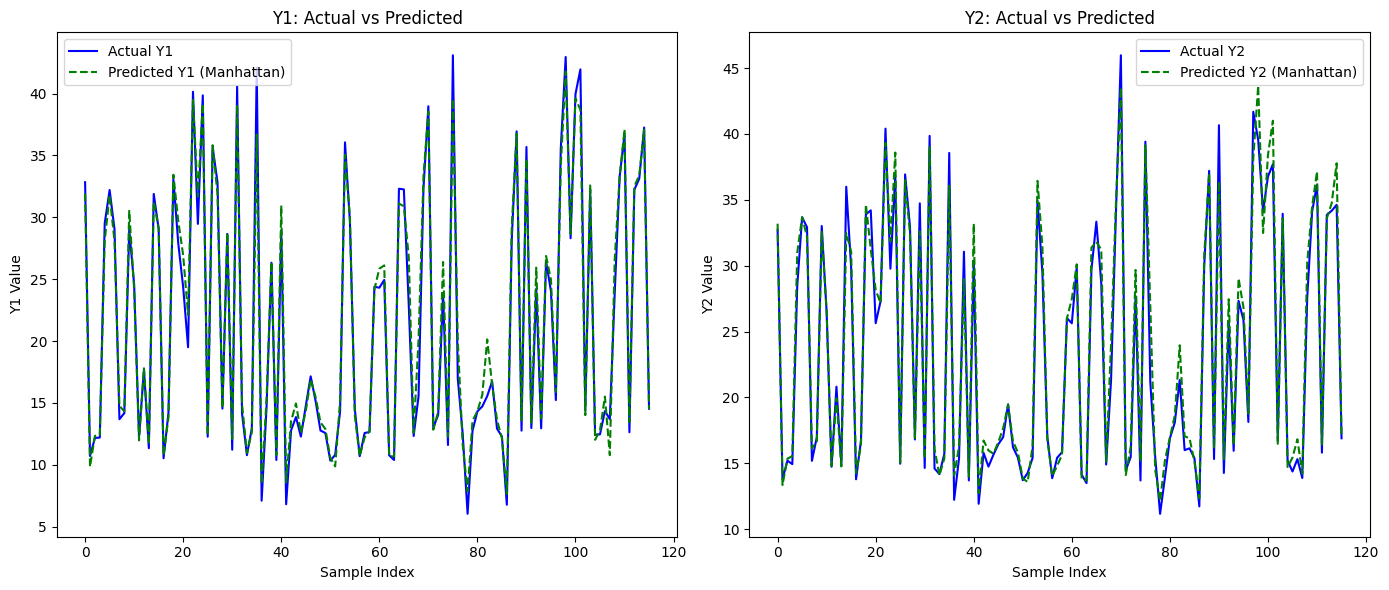

In [77]:
# Plot predictions vs actual values for Y1 and Y2
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(results['Y1_Actual'].values, label='Actual Y1', color='blue')
plt.plot(results['Y1_Predicted'].values, label='Predicted Y1 (Manhattan)', color='green', linestyle='dashed')
plt.title('Y1: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Y1 Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results['Y2_Actual'].values, label='Actual Y2', color='blue')
plt.plot(results['Y2_Predicted'].values, label='Predicted Y2 (Manhattan)', color='green', linestyle='dashed')
plt.title('Y2: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Y2 Value')
plt.legend()

plt.tight_layout()
plt.show()


#### Hasil dan Analisis

Berikut hasil MSE dan R-Squared dari beberapa nilai K yang di coba 
MSE score for method Euclidean with k=1 for Y1: 9.944921356521737, for Y2: 14.70825652173913
R² score for method Euclidean with k=1 for Y1: 0.902354078312554, for Y2: 0.8367191106866724
MSE score for method Manhattan with k=1 for Y1: 2.1363544, for Y2: 7.0773539130434795
R² score for method Manhattan with k=1 for Y1: 0.97902383669407, for Y2: 0.9214321126913376

MSE score for method Euclidean with k=2 for Y1: 7.008301686956522, for Y2: 9.495705652173914
R² score for method Euclidean with k=2 for Y1: 0.9311877838794796, for Y2: 0.8945852446037419
MSE score for method Manhattan with k=2 for Y1: 2.6284159913043474, for Y2: 4.382090652173915
R² score for method Manhattan with k=2 for Y1: 0.9741924452845849, for Y2: 0.9513530609368259

MSE score for method Euclidean with k=3 for Y1: 6.371861831884058, for Y2: 8.427610917874398
R² score for method Euclidean with k=3 for Y1: 0.9374367781167665, for Y2: 0.9064424934781778
MSE score for method Manhattan with k=3 for Y1: 2.7761010396135273, for Y2: 5.005430144927538
R² score for method Manhattan with k=3 for Y1: 0.9727423742237264, for Y2: 0.94443317708992

MSE score for method Euclidean with k=4 for Y1: 6.870303791304347, for Y2: 8.557923586956521
R² score for method Euclidean with k=4 for Y1: 0.9325427399649844, for Y2: 0.9049958523711865
MSE score for method Manhattan with k=4 for Y1: 2.3999433130434786, for Y2: 4.08571320652174
R² score for method Manhattan with k=4 for Y1: 0.9764357435922735, for Y2: 0.9546432383162436

MSE score for method Euclidean with k=5 for Y1: 7.516551301565218, for Y2: 9.17384059130435
R² score for method Euclidean with k=5 for Y1: 0.9261974475775028, for Y2: 0.8981583678559775
MSE score for method Manhattan with k=5 for Y1: 2.9602989050434774, for Y2: 3.502858886956522
R² score for method Manhattan with k=5 for Y1: 0.9709337957847454, for Y2: 0.9611136837764558

\
Nilai MSE yang lebih kecil menunjukkan bahwa model memiliki kesalahan prediksi yang lebih kecil.

R-Squared mengukur seberapa baik model dapat menjelaskan variabilitas data target. Nilai R-Squared berkisar antara 0 dan 1, dengan nilai yang lebih tinggi menunjukkan bahwa model lebih baik dalam menjelaskan variabilitas data.

#### Kesimpulan

- Performansi Model: Nilai R-Squared yang tinggi menunjukkan bahwa model K-Nearest Neighbors sangat efektif dalam menjelaskan variasi data dan memberikan prediksi yang cukup akurat untuk Heating Load dan Cooling Load.
- Kesalahan Prediksi: Meskipun terdapat beberapa kesalahan prediksi yang ditunjukkan oleh MSE, kesalahan ini cukup kecil, sehingga secara keseluruhan prediksi model cukup akurat.